In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt


In [2]:
df=[]
for i in range(0,5):
    df.append(-1)
for i in range(5,20):
    j="Cleansheet"+str(i)+".csv"
    df.append(pd.DataFrame(pd.read_csv(j))) 
for i in range(5,20):
    df[i].drop("Unnamed: 0",axis=1,inplace=True)
label0=["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
label1=["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming","Puerto Rico"]
for i in range(5,10):
    arr=df[i].to_numpy()
    df[i]=pd.DataFrame(arr,index=label0, columns=label0)
for i in range(10,20):
    arr=df[i].to_numpy()
    df[i]=pd.DataFrame(arr,index=label1, columns=label1)

In [3]:
G=[]
for i in range(0,21):
    G.append(0)
for i in range(5,20):
    G[i]=nx.from_pandas_adjacency(df[i])

In [4]:
#print("Current Working Directory " , os.getcwd())
#os.chdir("GMLs/")
#print("Current Working Directory " , os.getcwd())
for i in range(5,20):
    nx.write_gml(G[i],str(i)+".gml")


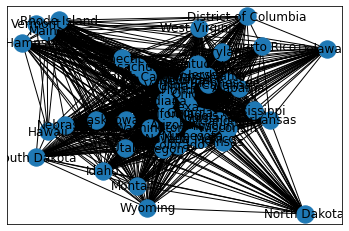

In [5]:
#nx.draw(G[5])
#plt.show()
nx.draw_networkx(G[5])

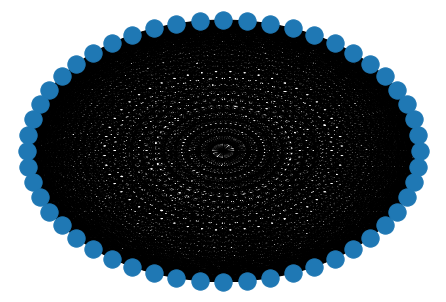

In [6]:
nx.draw_circular(G[5])

In [7]:
label0=["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
len(label0)

52

In [8]:
label=["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
def edge_activity_matrix(G):
    IM = np.zeros( (52, 52) )
    FM = np.zeros( (52, 52) )
    
    for k in range(5,20):
        for i in range(0,52):
            for j in range(0,52):
                if G[k].has_edge(label[i],label[j]):            #saves element in final matrix only when a 0 comes
                    IM[i,j]=IM[i,j]+1
                else:
                    FM[i,j]=int(IM[i,j])
                    IM[i,j]=0
    x=[]
    for i in range(0,52):
        for j in range(0,52):
            if IM[i,j]>FM[i,j]:
                FM[i,j]=int(IM[i,j])
                x.append(IM[i,j])                # if for an edge, we dont get inactive till the end,it checks if the value while terminating was greater than FM and if yes it will be replaced
            else:
                x.append(FM[i,j])
                
                    
    return x                              #Return FM for matrix and x for list

In [9]:
FML=edge_activity_matrix(G)
FML=list(map(int,FML))
def edge_act(FML):
    values=list(set(FML))
    counter=[]
    for i in values:
        x=FML.count(i)
        counter.append(x)
    
    Sum=sum(counter)
    prob=[]
    for i in counter:
        prob.append(i/Sum)
    
    plt.yscale("log")
    plt.plot(values,prob)
    plt.show()
    return prob[len(prob)-1]
    

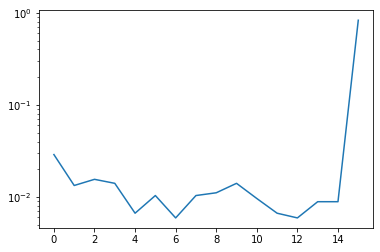

0.8298816568047337


In [10]:
p=edge_act(FML)
print(p)
    


In [11]:
###############checking randomly#############
T=0
F=0
count=0
for pi in range(100):
    x=0
    count+=1
    k=np.random.randint(52)
    j=np.random.randint(52)
    for i in range(5,20):
        if False==G[i].has_edge(label[j],label[k]):
            print(False)
            F=F+1
            x=1
            break
    if x==0:
        print(True)
        T=T+1
print(T,F,count)

True
True
True
True
True
True
False
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
False
True
False
True
True
True
False
85 15 100


In [12]:
label=["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
def edge_inactivity_matrix(G):
    IM = np.zeros( (52, 52) )
    FM = np.zeros( (52, 52) )
    #IM.fill(0)
    
    for k in range(5,20):
        for i in range(0,52):
            for j in range(0,52):
                if G[k].has_edge(label[i],label[j])==False:
                    IM[i,j]=IM[i,j]+1
                else:
                    FM[i,j]=int(IM[i,j])             #saves element in final matrix only when a 0 comes
                    IM[i,j]=0
    x=[]
    for i in range(0,52):
        for j in range(0,52):
            if IM[i,j]>FM[i,j]:
                FM[i,j]=int(IM[i,j])                 # if for an edge, we dont get inactive till the end,it checks if the value while terminating was greater than FM and if yes it will be replaced
                x.append(IM[i,j]) 
            else:
                x.append(FM[i,j])
                
                    
    return x                              #Return FM for matrix and x for list

In [13]:
FML=edge_inactivity_matrix(G)
FML=list(map(int,FML))

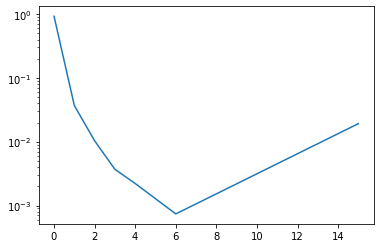

0.019230769230769232


In [14]:
p=edge_act(FML)
print(p)
    